# Dispersion in Planar Nonlocal Polar Layers


This Notebook checks the functionality of the dispersion and eigenmode solver code blocks against analytical solutions.

In [21]:
# import jtplot module in notebook
from jupyterthemes import jtplot
from matplotlib import rcParams

%config InlineBackend.figure_format = 'retina'

jtplot.style(context='notebook', fscale=1.0, spines=True, gridlines='--', ticks=True, grid=False, figsize=(10, 8))

rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Monokai']

# from dispersion import layer_dispersion, field_gen
from materials.materials import Media, properties
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [39]:
props = properties('AlN') # Loads the material properties, in this case for 4H-SiC

kx = np.linspace(500, 740, 4) # Creates a dummy array for kx, unused in this case
wn = np.linspace(0.9*props['wto_pe'], 1.05*props['wlo_pe'], 1000) # Sets a wavenumber range to probe over

angle = 80
mat1 = Media('AlN', props, wn, ang=angle) # Creates an instand of the Media class

# eigs, vecs = layer_dispersion(wn, 'SiC4H', ang=angle)

eigs, vecs = mat1._eigs, mat1._vecs
results = mat1._fields
# results = field_gen(wn, eigs, vecs[:,5:,:], 'SiC4H', ang=angle)

## Photonic Modes
The lowest 2 indexed modes in `eigs` are the photonic modes. In this cell block we compare their dispersion and fields to analytical solutions.

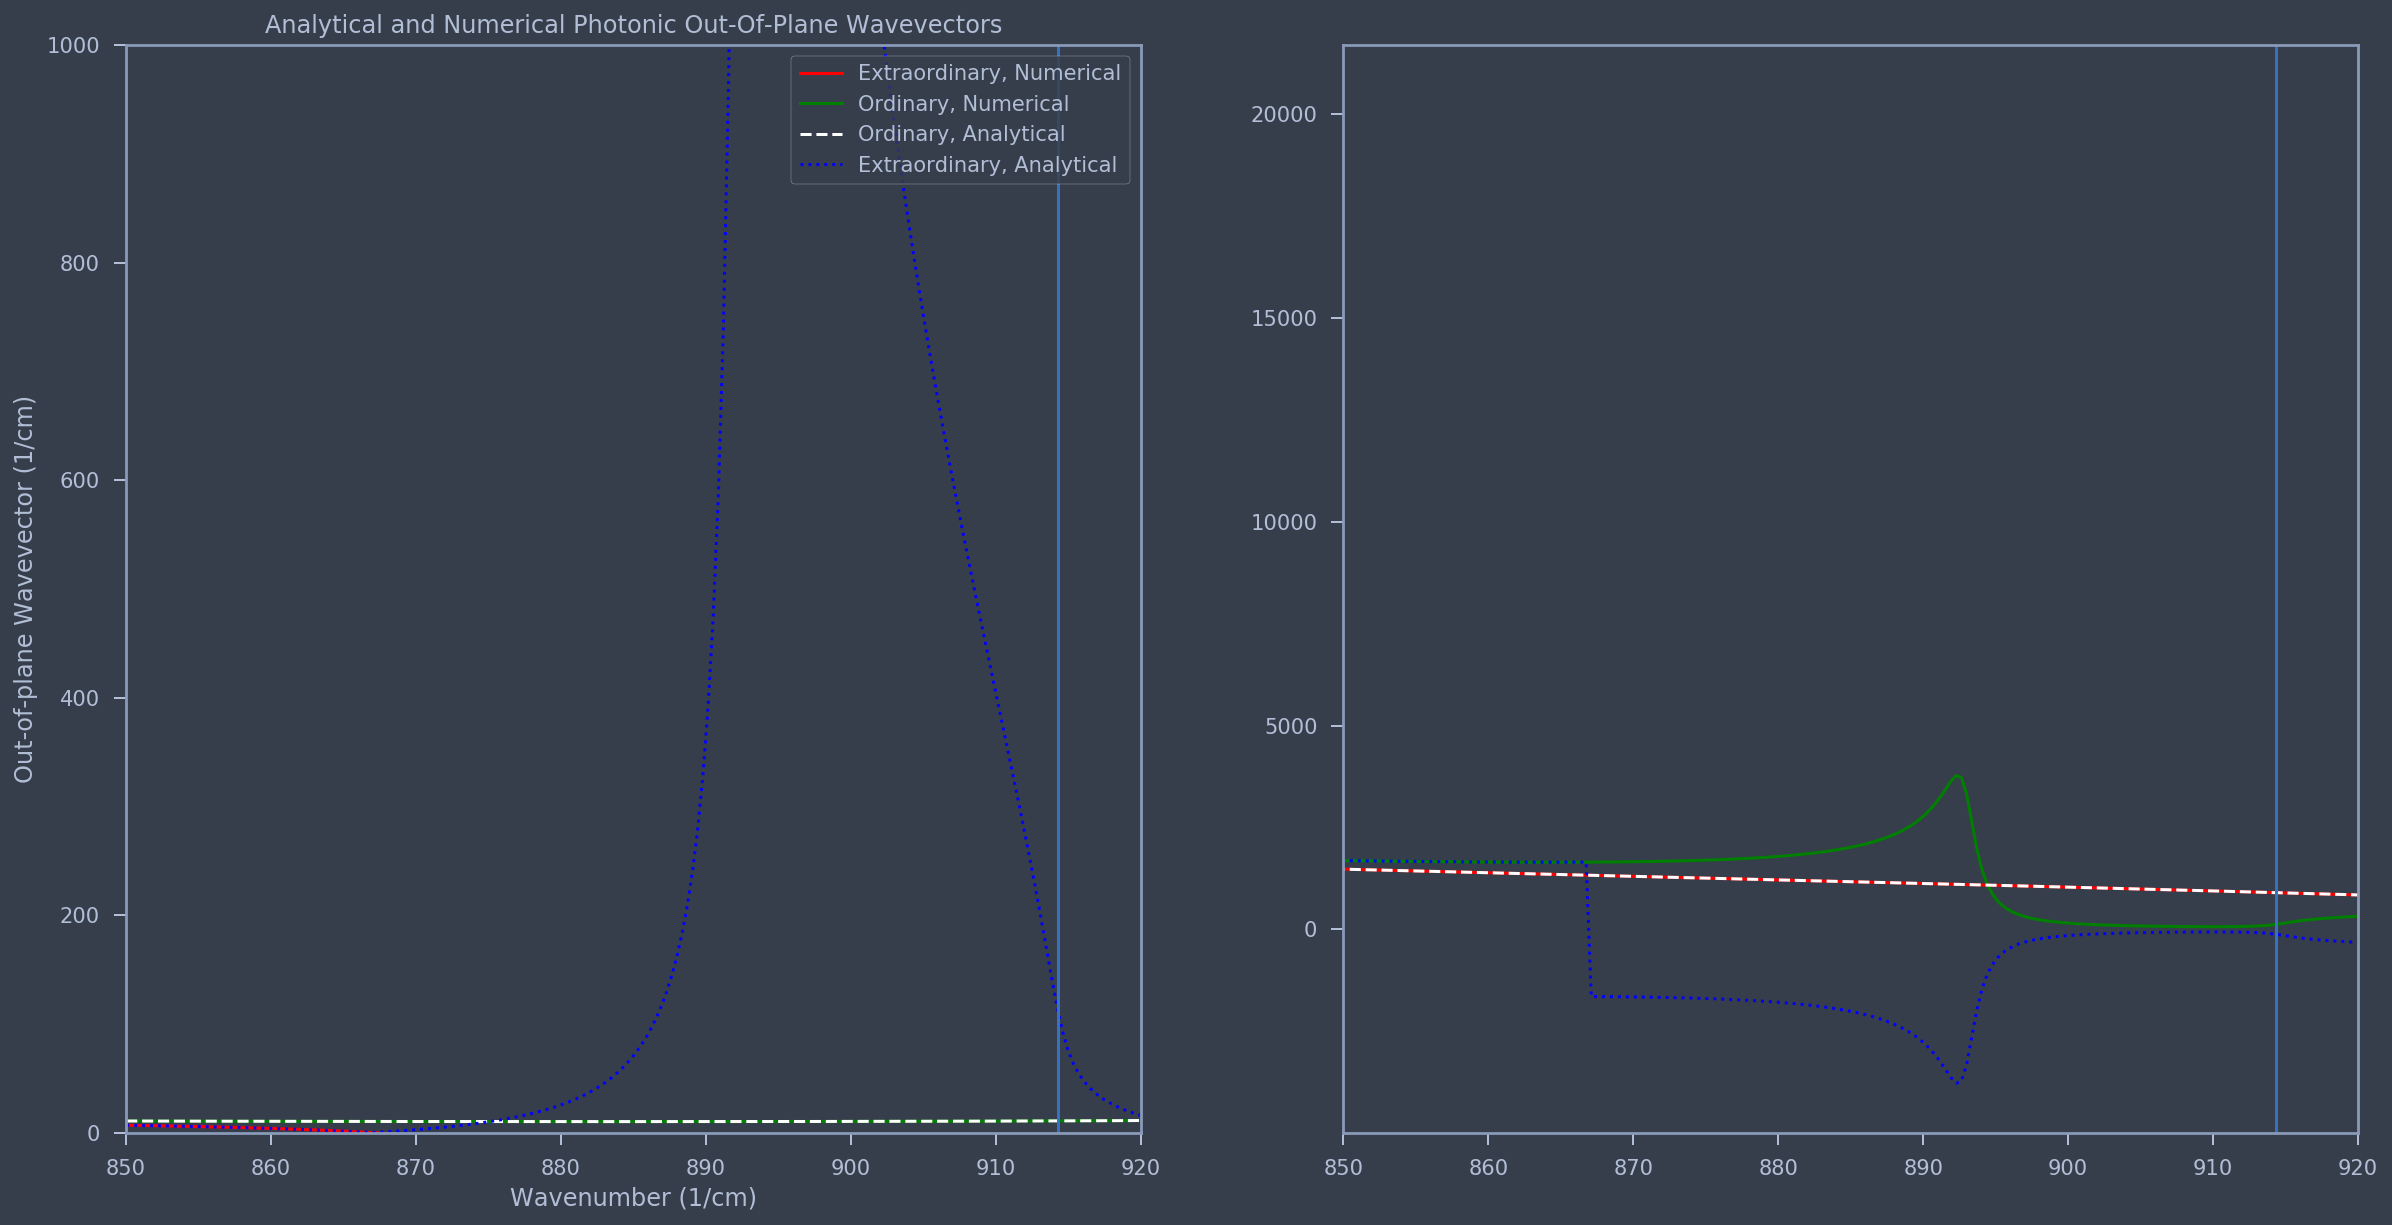

In [42]:
def alpha_o(kx, wn, mat):
    # Returns the out-of-plane wavevector for the ordinary mode in material mat
    return np.sqrt(wn**2*mat._eps[:,1,1] - kx**2)

def alpha_e(kx, wn, mat):
    # Returns the out-of-plane wavevector for the extraordinary mode in material mat
    return np.sqrt(wn**2*mat._eps[:,0,0] - kx**2*mat._eps[:,0,0]/mat._eps[:,2,2])

af = np.sin(angle*np.pi/180) # Sets the angular factor to use in the analytical calculation

fig, (ax1, ax2) = plt.subplots(figsize=(20, 10), ncols=2, sharex=True)

ax1.plot(wn, (wn*eigs[:,1].real), color='red',linestyle='solid', label='Extraordinary, Numerical')
ax1.plot(wn, (wn*eigs[:,0].real), color='green',linestyle='solid', label='Ordinary, Numerical')
ax1.plot(wn, alpha_o(af*wn, wn, mat1).real, color='white',linestyle='dashed', label='Ordinary, Analytical')
ax1.plot(wn, alpha_e(af*wn, wn, mat1).real, color='blue',linestyle='dotted', label='Extraordinary, Analytical')
ax1.axvline(mat1._wlo_pe)
# ax1.set_xlim(min(wn), max(wn))
ax1.set_xlim(850, 920)
ax1.set_ylim(0, 1000)
ax1.set_xlabel('Wavenumber (1/cm)')
ax1.set_ylabel('Out-of-plane Wavevector (1/cm)')
ax1.set_title('Analytical and Numerical Photonic Out-Of-Plane Wavevectors')
ax1.legend(loc='upper right')

ax2.plot(wn, (wn*eigs[:,0].imag), color='red',linestyle='solid', label='Extraordinary, Numerical')
ax2.plot(wn, (wn*eigs[:,1].imag), color='green',linestyle='solid', label='Ordinary, Numerical')
ax2.plot(wn, alpha_o(af*wn, wn, mat1).imag, color='white',linestyle='dashed', label='Ordinary, Analytical')
ax2.plot(wn, alpha_e(af*wn, wn, mat1).imag, color='blue',linestyle='dotted', label='Extraordinary, Analytical')
ax2.axvline(mat1._wlo_pe)
# ax2.set_ylim(0, 18000)
plt.show()

### TE Polarised (Ordinary) Modes


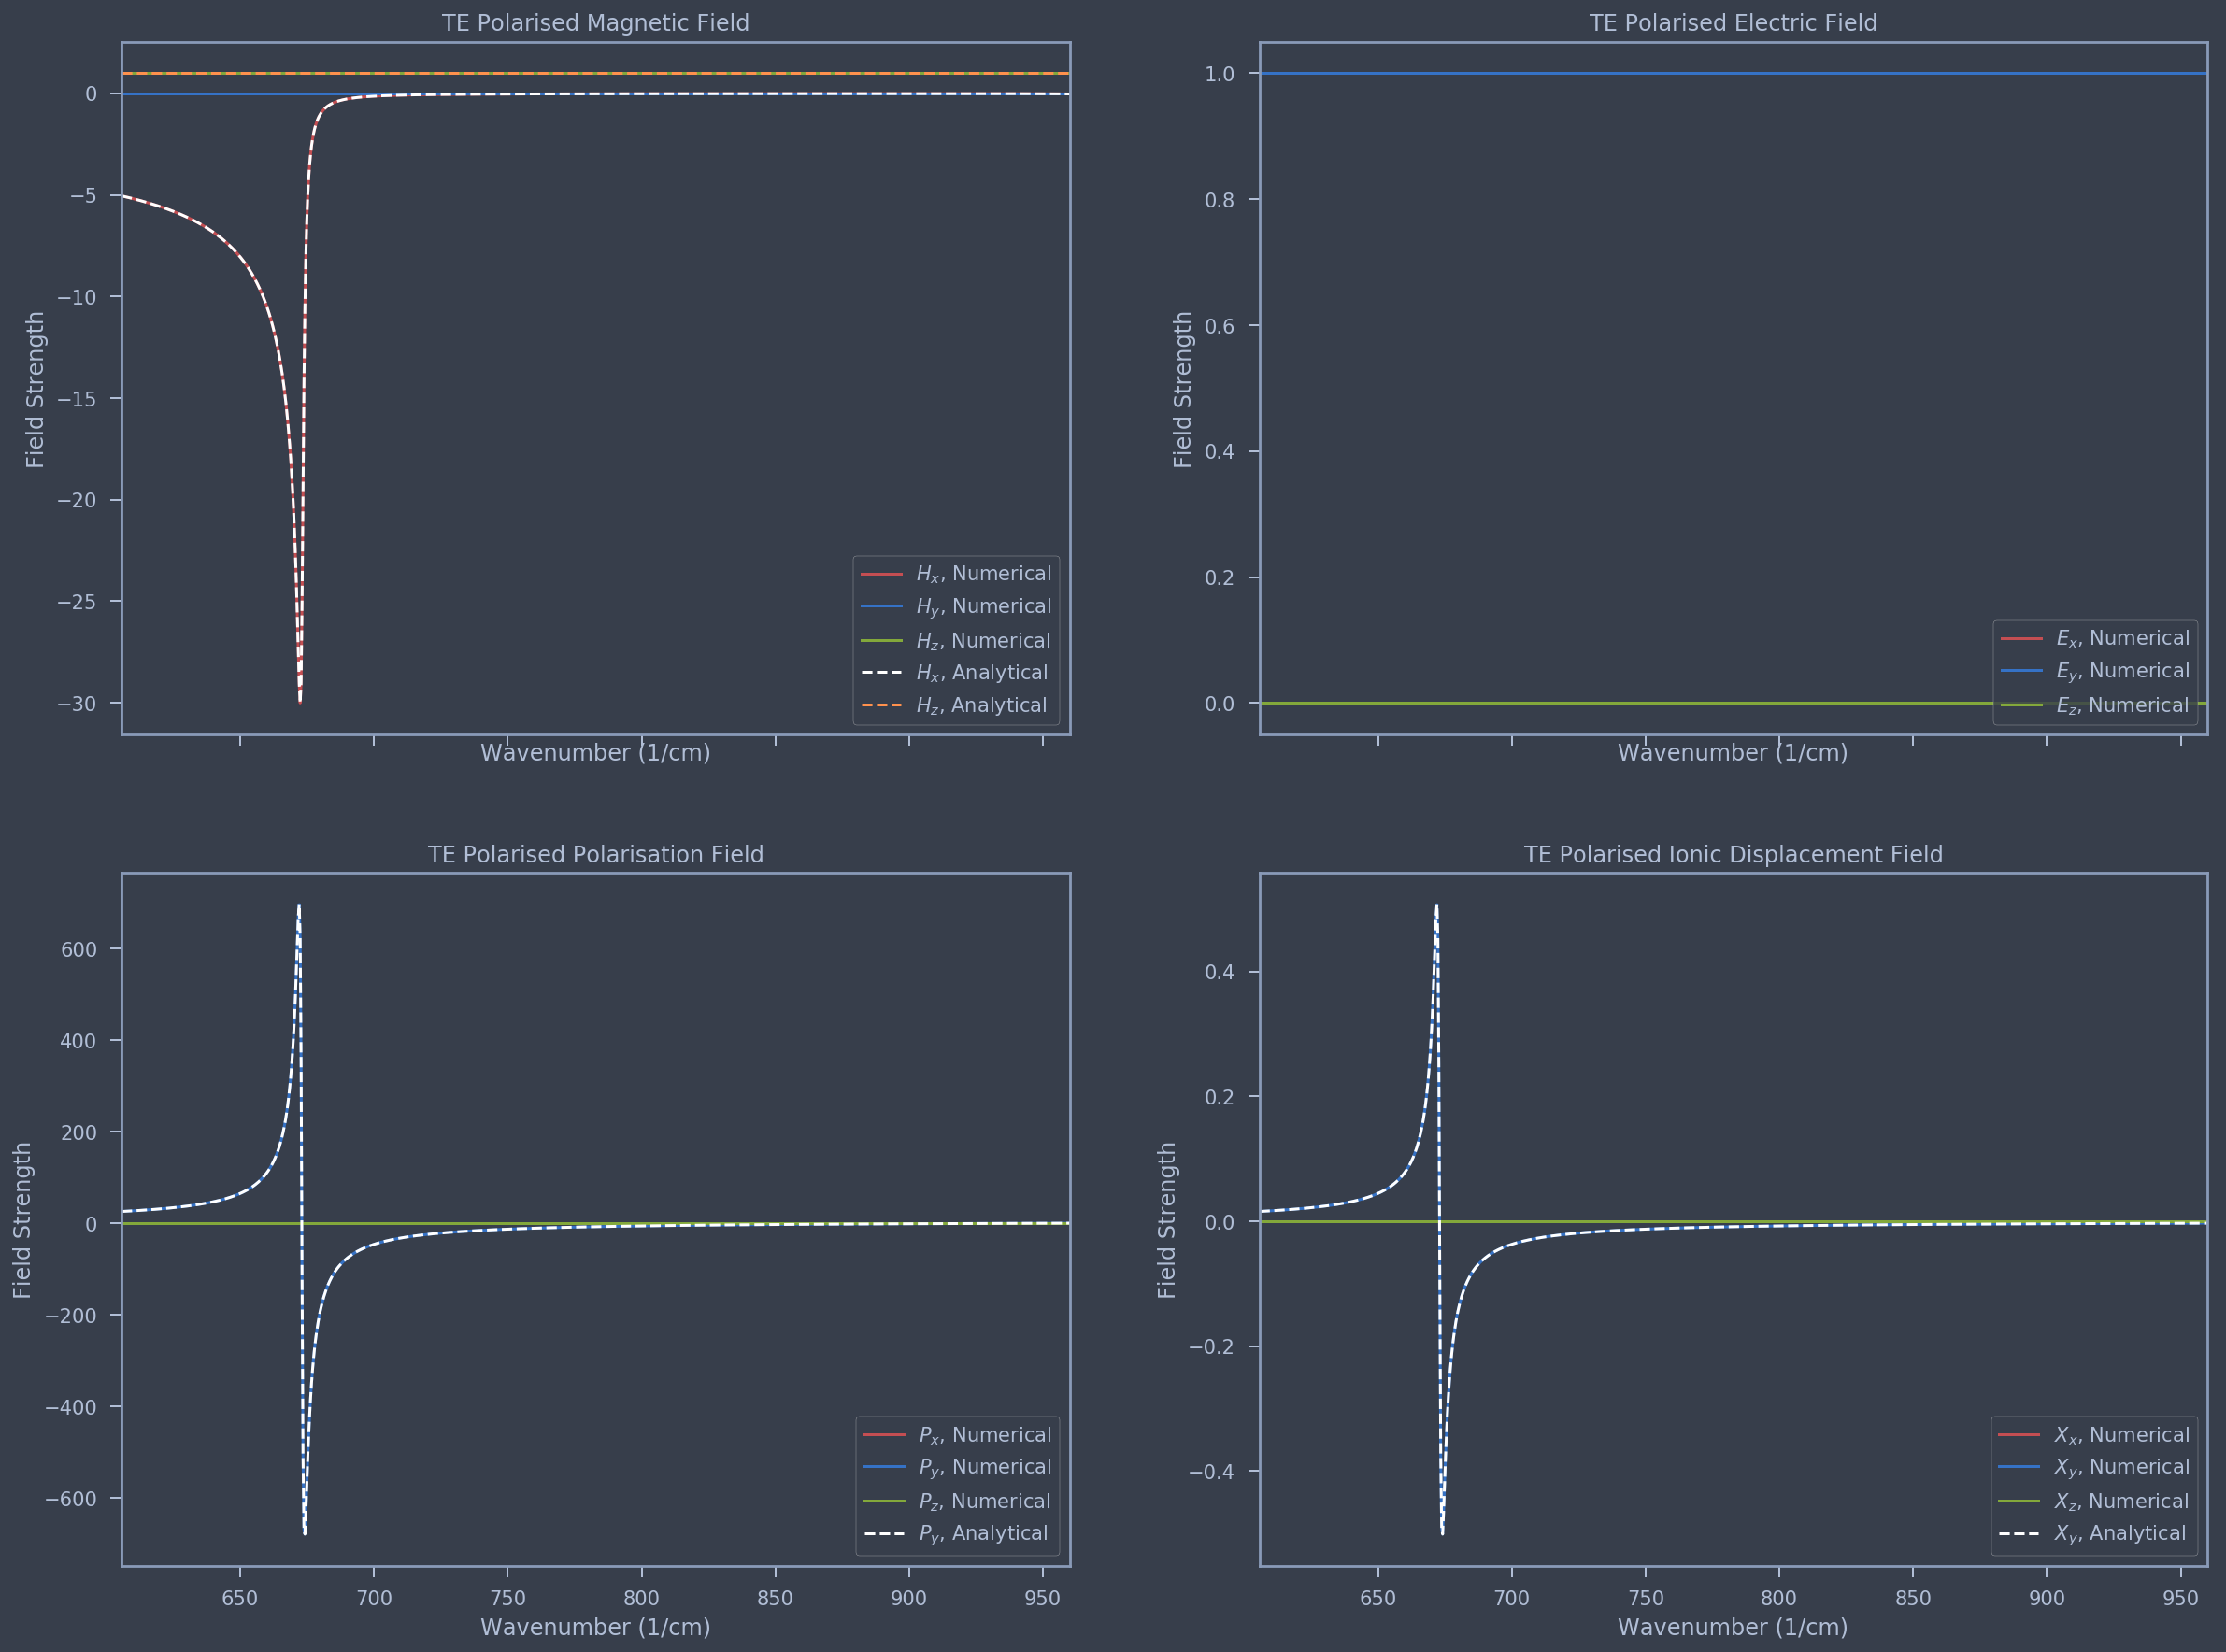

In [18]:
# Compute analytical fields
zeta = np.zeros_like(wn)
zeta[:] = np.sin(angle*np.pi/180)
Eyte = np.ones(len(zeta))
qzan = alpha_o(af*wn, wn, mat1)/wn
Hztean = 1*zeta*Eyte/mat1._mu[0,0]
Hxtean = -1*qzan*Eyte/mat1._mu[2,2]
Pytean = Eyte*(mat1._eps[:,1,1]-1)


fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(figsize=(20, 15), ncols=2, nrows=2, sharex=True)

ax1.plot(wn, (results[:, 0, 0]).real, 'r-', label='$H_x$, Numerical')
ax1.plot(wn, (results[:, 0, 1]).real, 'b-', label='$H_y$, Numerical')
ax1.plot(wn, (results[:, 0, 2]).real, 'g-', label='$H_z$, Numerical')

ax1.plot(wn, Hxtean.real, 'w--', label='$H_x$, Analytical')
ax1.plot(wn, Hztean.real, 'y--', label='$H_z$, Analytical')

ax2.plot(wn, (results[:, 0, 3]).real, 'r-', label='$E_x$, Numerical')
ax2.plot(wn, (results[:, 0, 4]).real, 'b-', label='$E_y$, Numerical')
ax2.plot(wn, (results[:, 0, 5]).real, 'g-', label='$E_z$, Numerical')

ax3.plot(wn, (results[:, 0, 6]).real, 'r-', label='$P_x$, Numerical')
ax3.plot(wn, (results[:, 0, 7]).real, 'b-', label='$P_y$, Numerical')
ax3.plot(wn, (results[:, 0, 8]).real, 'g-', label='$P_z$, Numerical')

ax3.plot(wn, Pytean.real, 'w--', label='$P_y$, Analytical')

ax4.plot(wn, (results[:, 0, 9]).real, 'r-', label='$X_x$, Numerical')
ax4.plot(wn, (results[:, 0, 10]).real, 'b-', label='$X_y$, Numerical')
ax4.plot(wn, (results[:, 0, 11]).real, 'g-', label='$X_z$, Numerical')
ax4.plot(wn, 1/mat1._alpha[1,1]*(Pytean-(mat1._eps_inf[1,1]-1)*1).real, 'w--', label='$X_y$, Analytical')

ax1.set_xlim(min(wn), max(wn))

axes = [ax1, ax2, ax3, ax4]
for ax in axes:
    ax.set_xlabel('Wavenumber (1/cm)')
    ax.set_ylabel('Field Strength')
    ax.legend(loc='lower right')
    
ax1.set_title('TE Polarised Magnetic Field')
ax2.set_title('TE Polarised Electric Field')
ax3.set_title('TE Polarised Polarisation Field')
ax4.set_title('TE Polarised Ionic Displacement Field')

plt.show()

### TM Polarised (Extraordinary) Mode

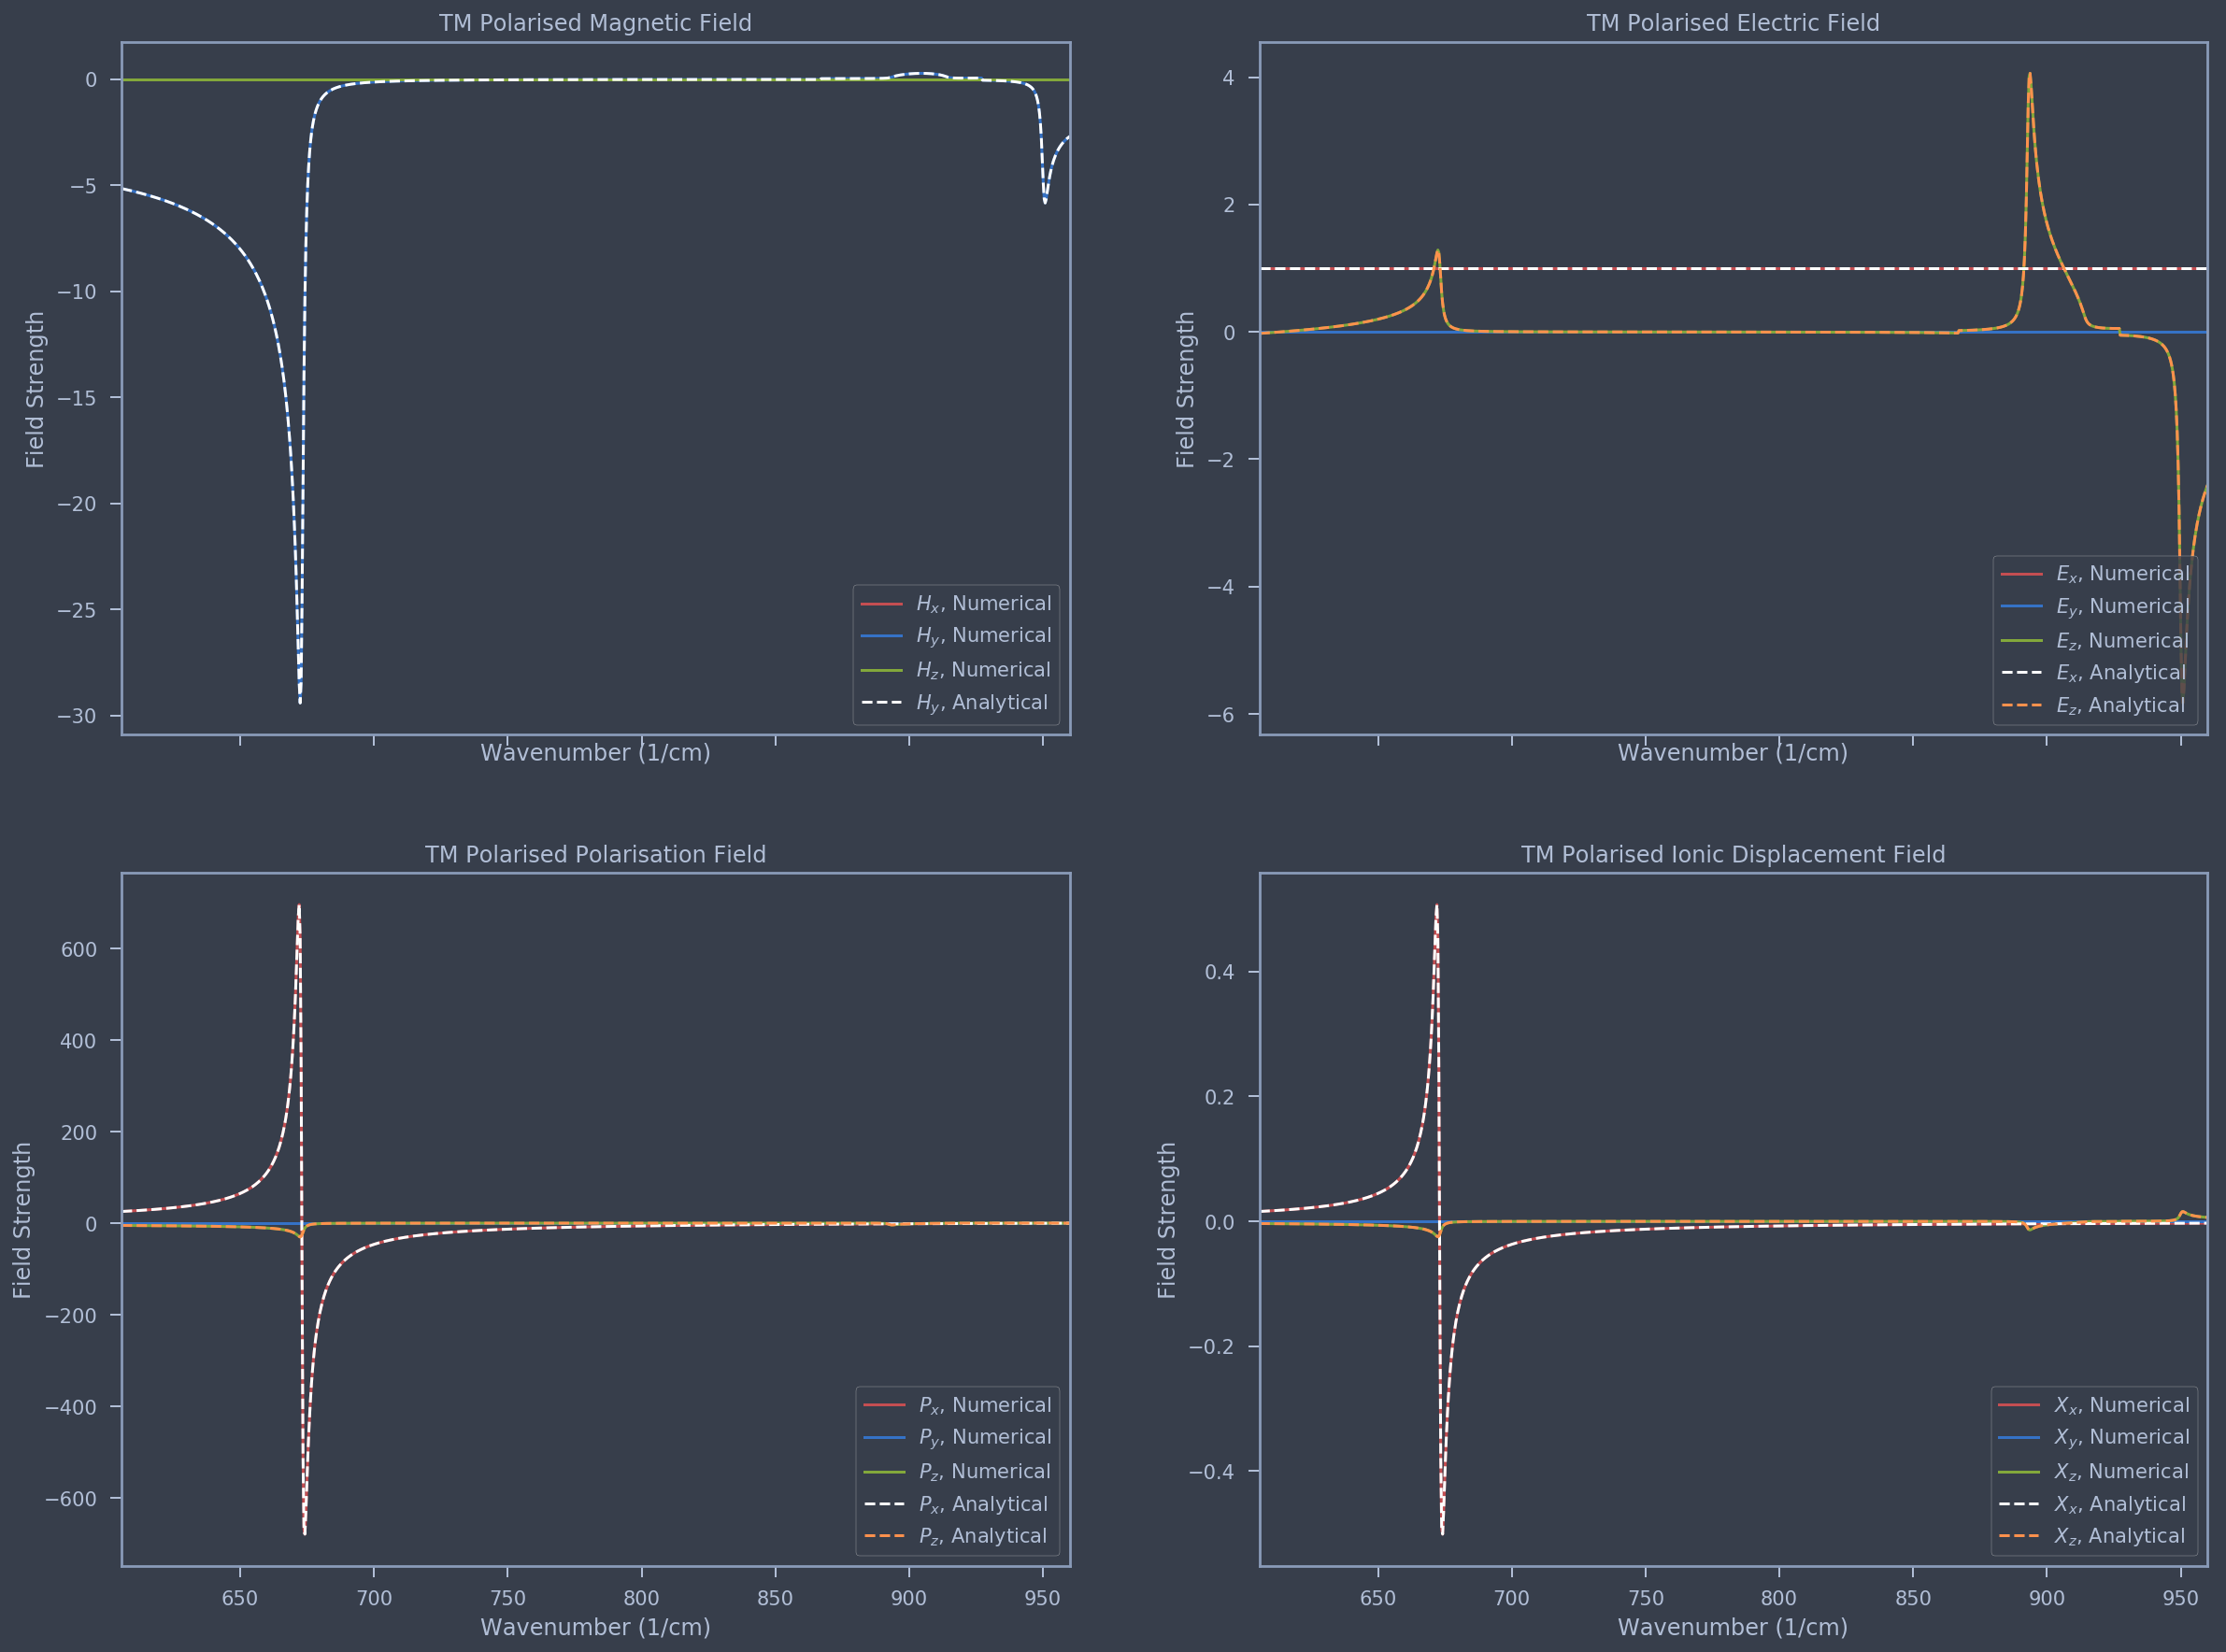

In [19]:
# Compute analytical fields

qzan = alpha_e(af*wn, wn, mat1)/wn

# Extman = -1*qzan*Eyte/mat1._eps[:,0,0]
# Eztman = 1*zeta*Eyte/mat1._eps[:,2,2]

Extman = Eyte
Eztman = -Extman*zeta/qzan*mat1._eps[:,0,0]/mat1._eps[:,2,2]

Hytman = zeta*Eztman-qzan*Extman

Pxtman = Extman*(mat1._eps[:,0,0]-1)
Pztman = Eztman*(mat1._eps[:,2,2]-1)

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(figsize=(20, 15), ncols=2, nrows=2, sharex=True)

ax1.plot(wn, (results[:, 1, 0]).real, 'r-', label='$H_x$, Numerical')
ax1.plot(wn, (results[:, 1, 1]).real, 'b-', label='$H_y$, Numerical')
ax1.plot(wn, (results[:, 1, 2]).real, 'g-', label='$H_z$, Numerical')

ax1.plot(wn, Hytman.real, 'w--', label='$H_y$, Analytical')

ax2.plot(wn, (results[:, 1, 3]).real, 'r-', label='$E_x$, Numerical')
ax2.plot(wn, (results[:, 1, 4]).real, 'b-', label='$E_y$, Numerical')
ax2.plot(wn, (results[:, 1, 5]).real, 'g-', label='$E_z$, Numerical')

ax2.plot(wn, Extman.real, 'w--', label='$E_x$, Analytical')
ax2.plot(wn, Eztman.real, 'y--', label='$E_z$, Analytical')

ax3.plot(wn, (results[:, 1, 6]).real, 'r-', label='$P_x$, Numerical')
ax3.plot(wn, (results[:, 1, 7]).real, 'b-', label='$P_y$, Numerical')
ax3.plot(wn, (results[:, 1, 8]).real, 'g-', label='$P_z$, Numerical')

ax3.plot(wn, Pxtman.real, 'w--', label='$P_x$, Analytical')
ax3.plot(wn, Pztman.real, 'y--', label='$P_z$, Analytical')

ax4.plot(wn, (results[:, 1, 9]).real, 'r-', label='$X_x$, Numerical')
ax4.plot(wn, (results[:, 1, 10]).real, 'b-', label='$X_y$, Numerical')
ax4.plot(wn, (results[:, 1, 11]).real, 'g-', label='$X_z$, Numerical')

ax4.plot(wn, 1/mat1._alpha[0,0]*(Pxtman-(mat1._eps_inf[0,0]-1)*Extman).real, 'w--', label='$X_x$, Analytical')
ax4.plot(wn, 1/mat1._alpha[2,2]*(Pztman-(mat1._eps_inf[2,2]-1)*Eztman).real, 'y--', label='$X_z$, Analytical')

ax1.set_xlim(min(wn), max(wn))

axes = [ax1, ax2, ax3, ax4]
for ax in axes:
    ax.set_xlabel('Wavenumber (1/cm)')
    ax.set_ylabel('Field Strength')
    ax.legend(loc='lower right')
    
ax1.set_title('TM Polarised Magnetic Field')
ax2.set_title('TM Polarised Electric Field')
ax3.set_title('TM Polarised Polarisation Field')
ax4.set_title('TM Polarised Ionic Displacement Field')

plt.show()

# TO Phonons

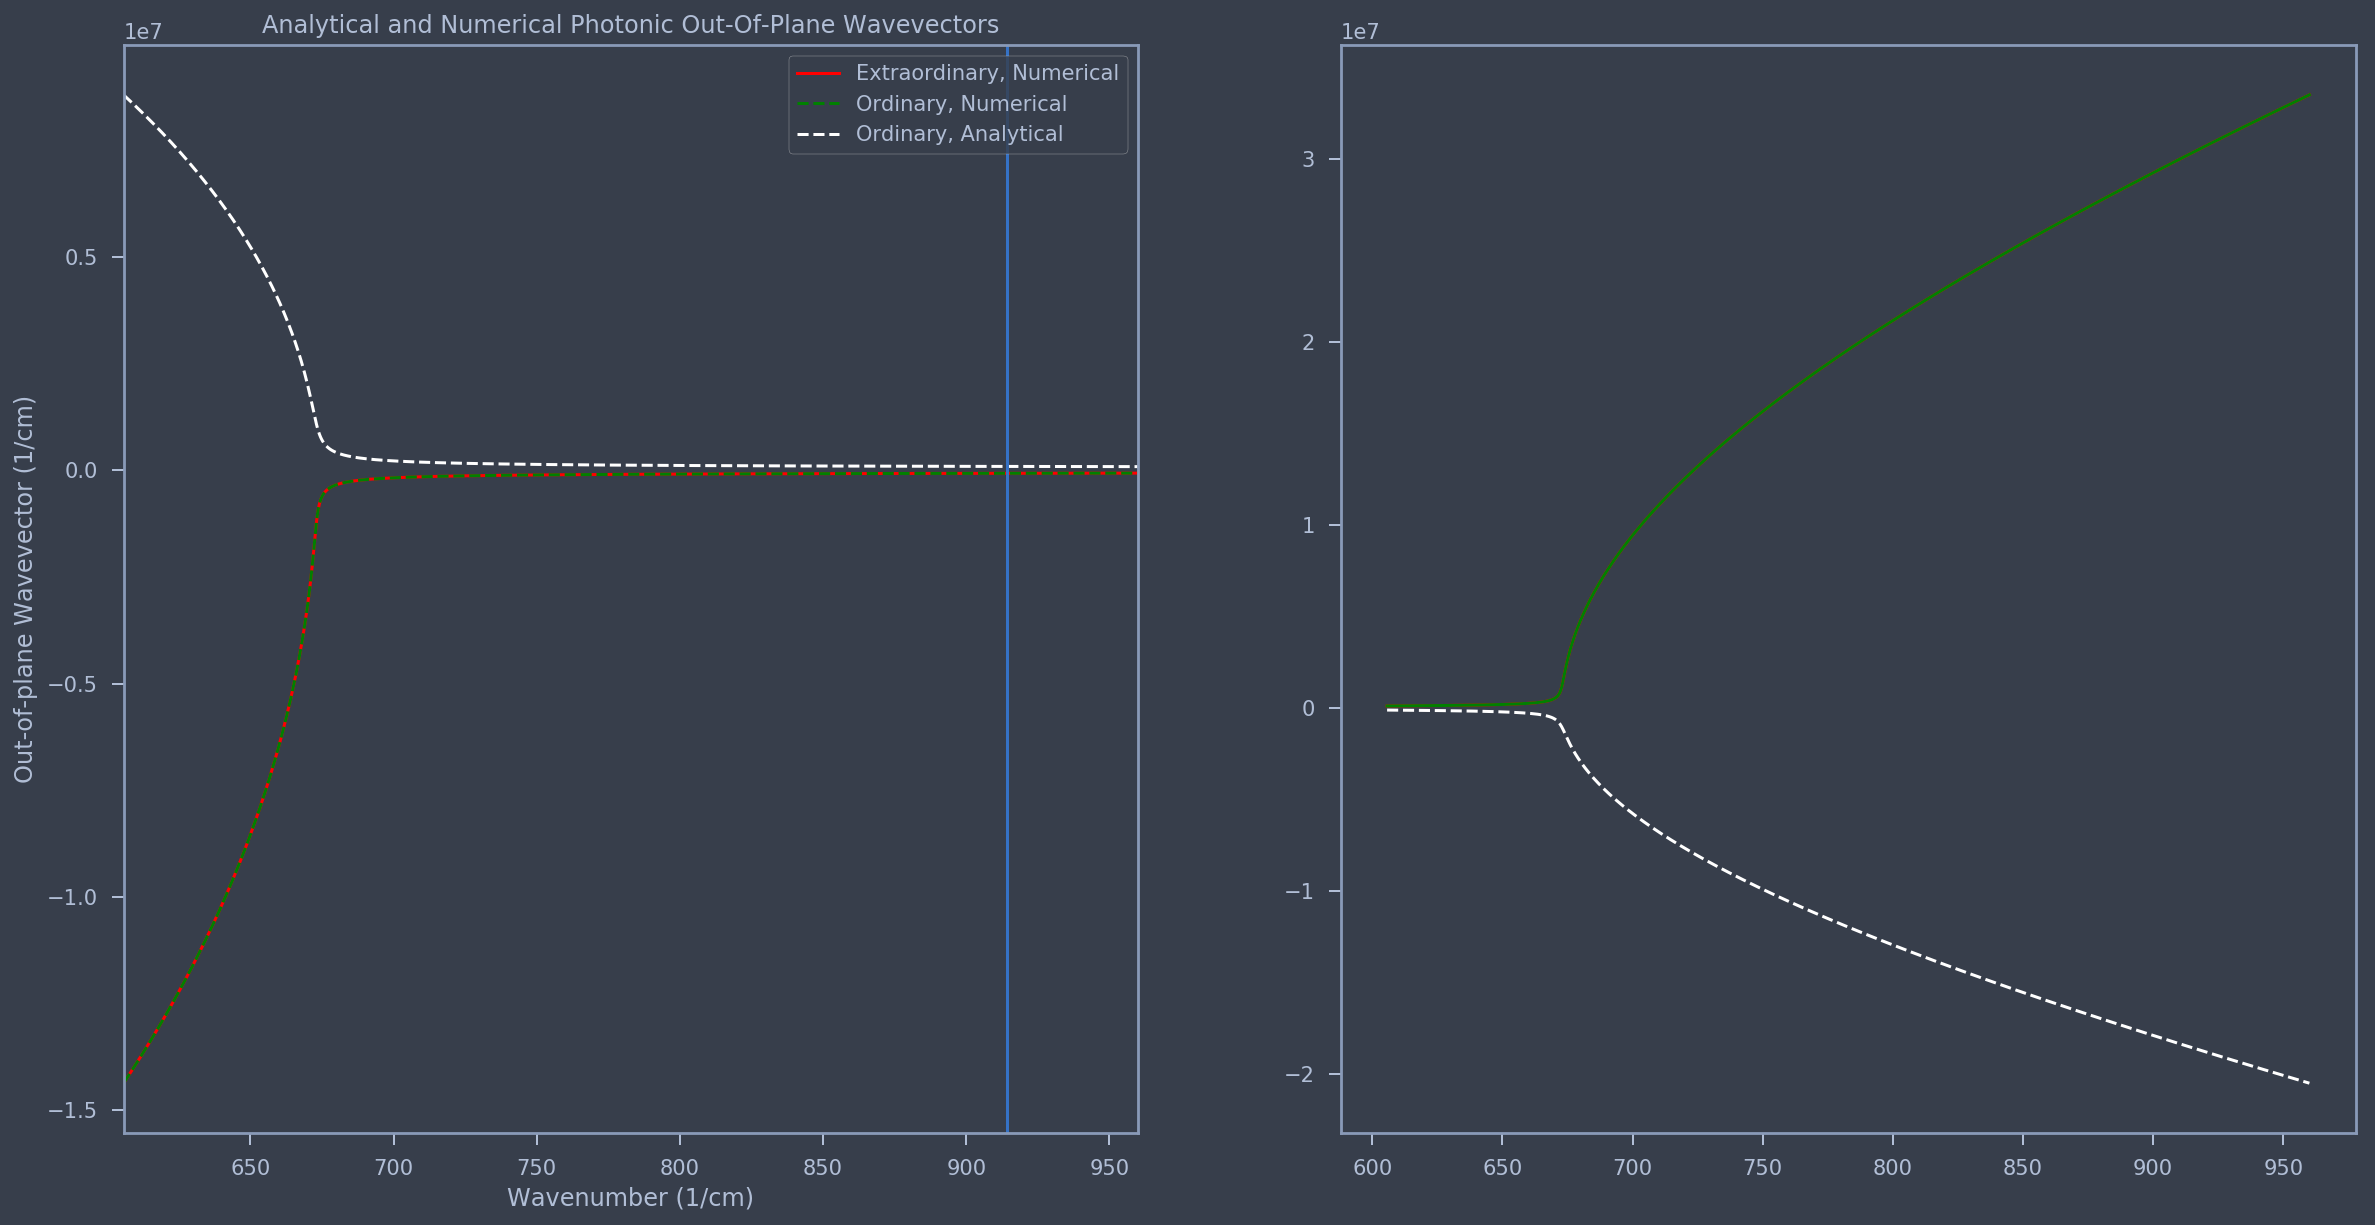

In [20]:
from scipy.constants import speed_of_light

def beta_t(kx, wn, mat):
    # Returns the out-of-plane wavevector for the ordinary mode in material mat
    gamma = 4
    beta_t = 1e4/speed_of_light
    return np.sqrt(mat1._wto_pe**2 - wn*(wn+1j*gamma))/beta_t

af = np.sin(angle*np.pi/180) # Sets the angular factor to use in the analytical calculation

fig, (ax1, ax2) = plt.subplots(figsize=(20, 10), ncols=2)

ax1.plot(wn, (wn*eigs[:,3].real), color='red',linestyle='solid', label='Extraordinary, Numerical')
ax1.plot(wn, (wn*eigs[:,2].real), color='green',linestyle='dashed', label='Ordinary, Numerical')
ax1.plot(wn, beta_t(af*wn, wn, mat1).real, color='white',linestyle='dashed', label='Ordinary, Analytical')
ax1.axvline(mat1._wlo_pe)
ax1.set_xlim(min(wn), max(wn))
ax1.set_xlabel('Wavenumber (1/cm)')
ax1.set_ylabel('Out-of-plane Wavevector (1/cm)')
ax1.set_title('Analytical and Numerical Photonic Out-Of-Plane Wavevectors')
ax1.legend(loc='upper right')

ax2.plot(wn, (wn*eigs[:,3].imag), color='red',linestyle='solid', label='Extraordinary, Numerical')
ax2.plot(wn, (wn*eigs[:,2].imag), color='green',linestyle='solid', label='Ordinary, Numerical')
ax2.plot(wn, beta_t(af*wn, wn, mat1).imag, color='white',linestyle='dashed', label='Ordinary, Analytical')

plt.show()

### Ordinary Mode

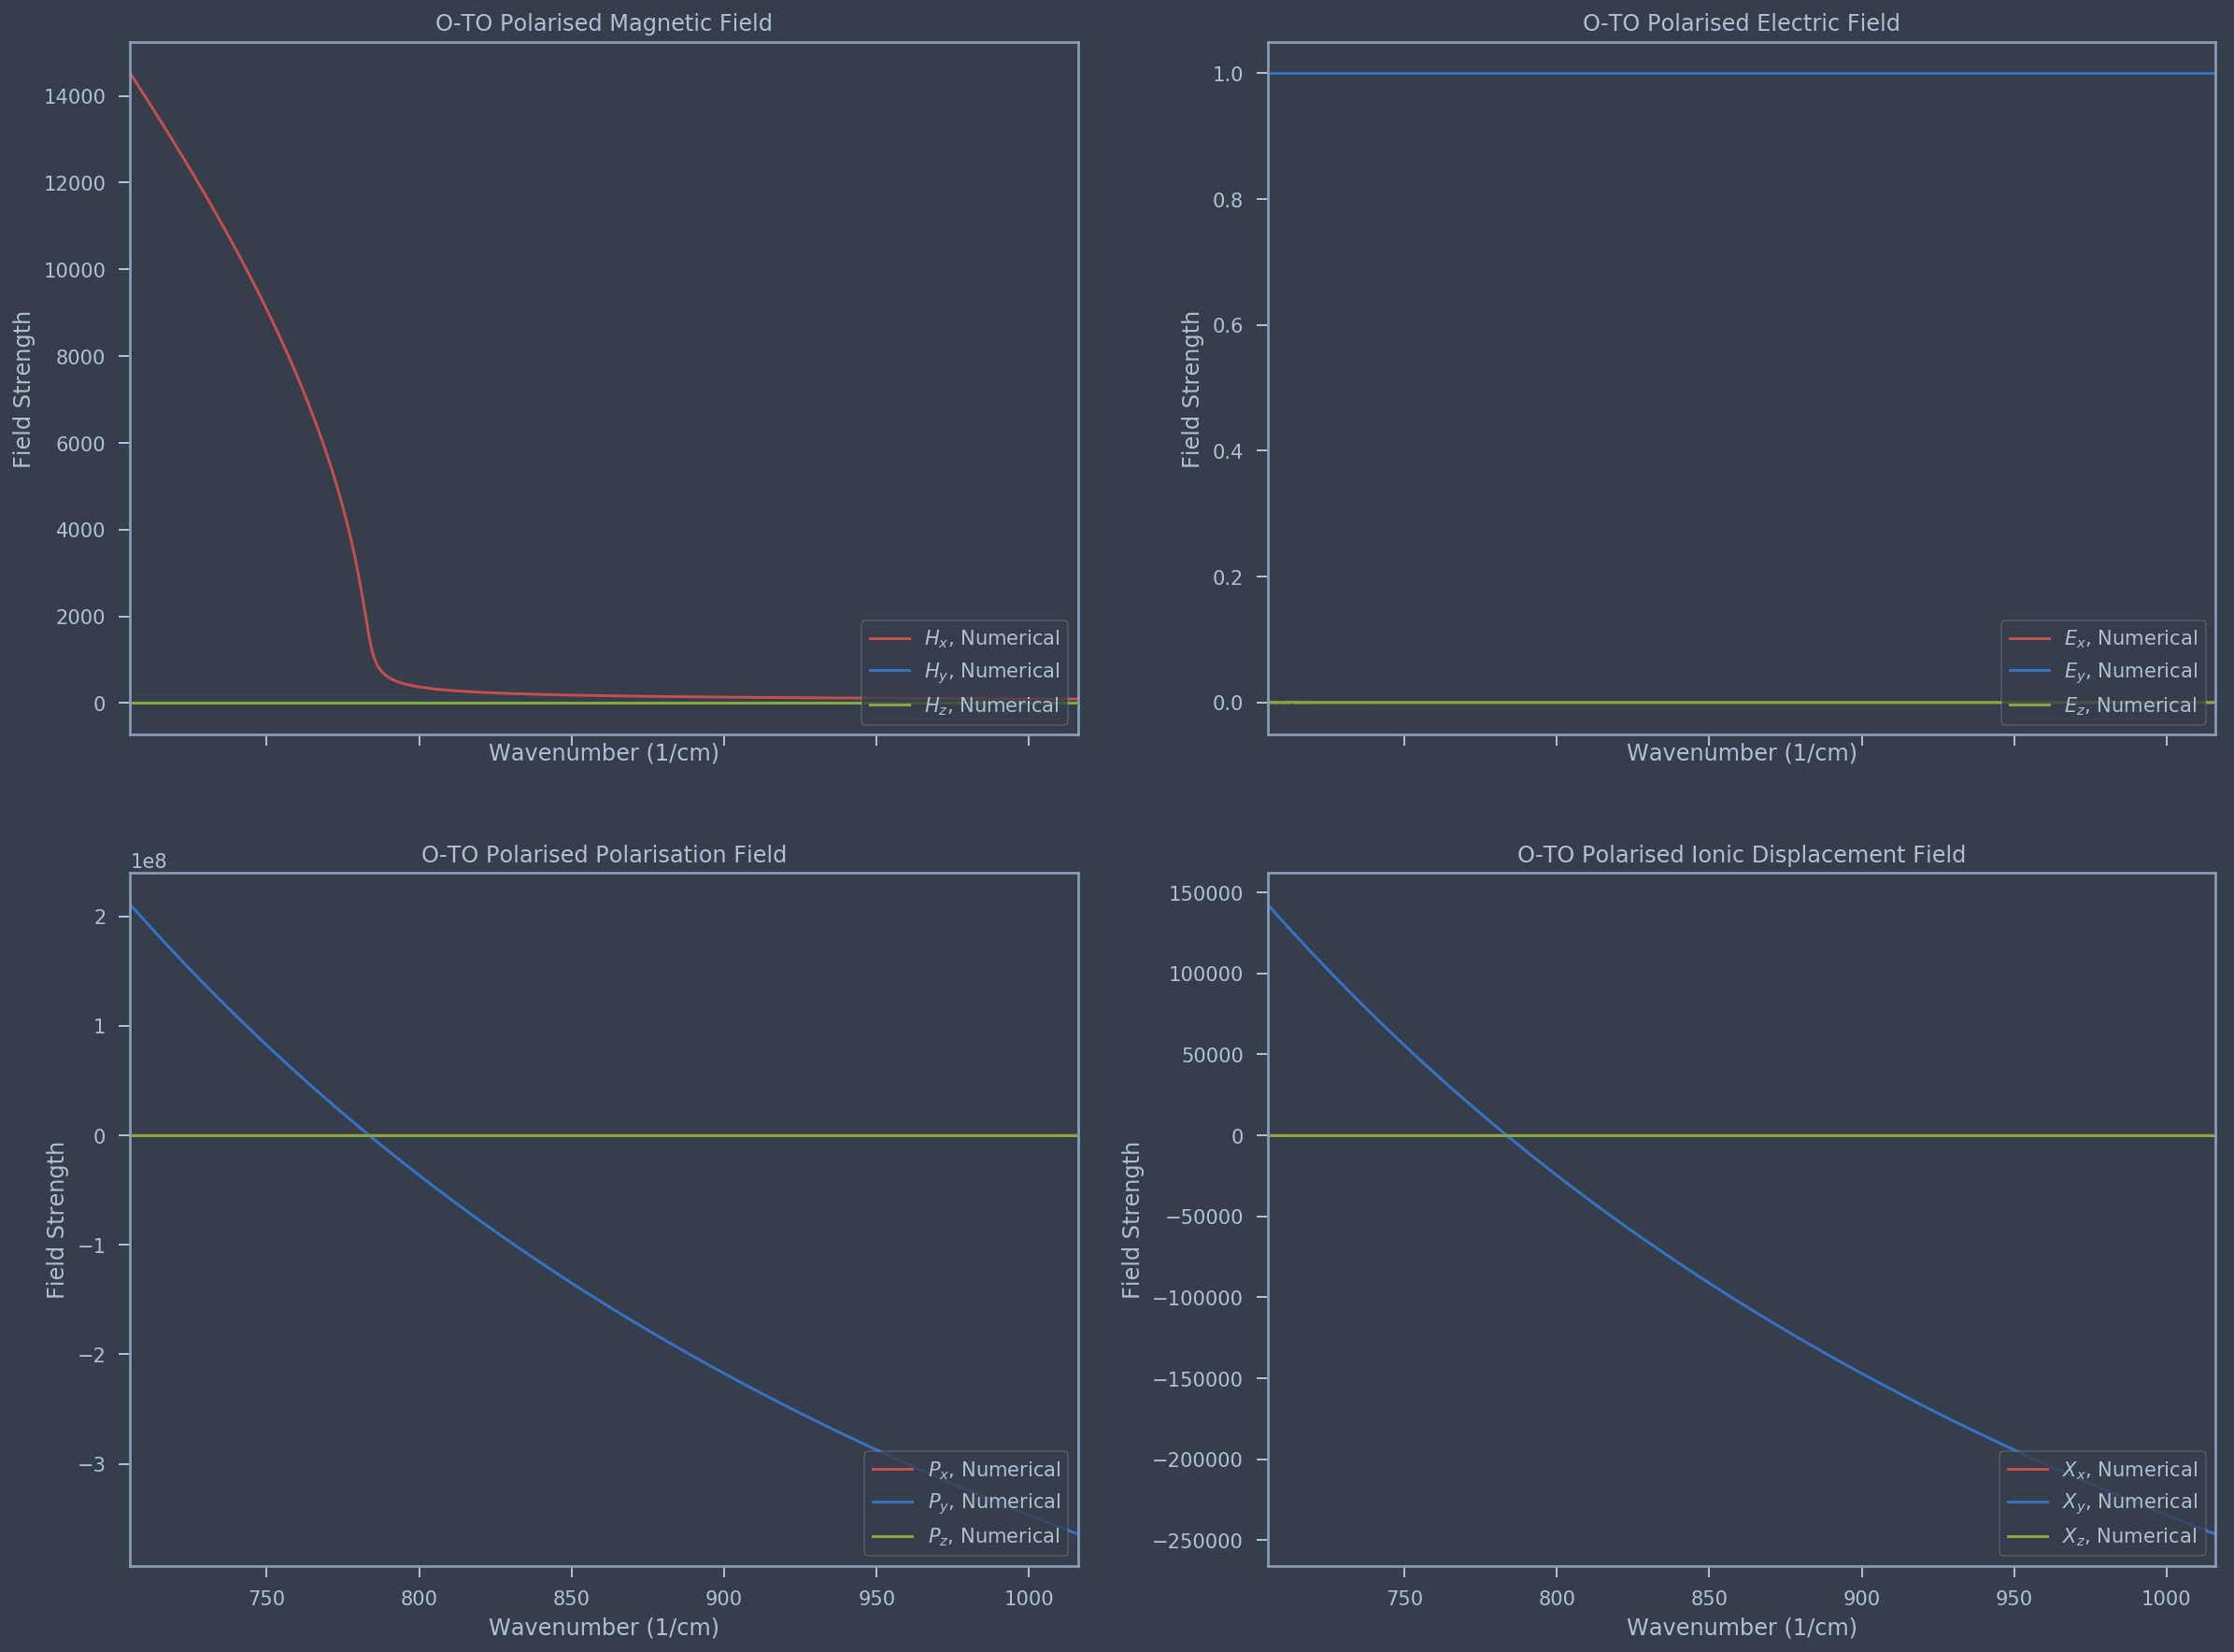

In [43]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(figsize=(20, 15), ncols=2, nrows=2, sharex=True)

ax1.plot(wn, (results[:, 2, 0]).real, 'r-', label='$H_x$, Numerical')
ax1.plot(wn, (results[:, 2, 1]).real, 'b-', label='$H_y$, Numerical')
ax1.plot(wn, (results[:, 2, 2]).real, 'g-', label='$H_z$, Numerical')

ax2.plot(wn, (results[:, 2, 3]).real, 'r-', label='$E_x$, Numerical')
ax2.plot(wn, (results[:, 2, 4]).real, 'b-', label='$E_y$, Numerical')
ax2.plot(wn, (results[:, 2, 5]).real, 'g-', label='$E_z$, Numerical')

ax3.plot(wn, (results[:, 2, 6]).real, 'r-', label='$P_x$, Numerical')
ax3.plot(wn, (results[:, 2, 7]).real, 'b-', label='$P_y$, Numerical')
ax3.plot(wn, (results[:, 2, 8]).real, 'g-', label='$P_z$, Numerical')

ax4.plot(wn, (results[:, 2, 9]).real, 'r-', label='$X_x$, Numerical')
ax4.plot(wn, (results[:, 2, 10]).real, 'b-', label='$X_y$, Numerical')
ax4.plot(wn, (results[:, 2, 11]).real, 'g-', label='$X_z$, Numerical')

ax1.set_xlim(min(wn), max(wn))

axes = [ax1, ax2, ax3, ax4]
for ax in axes:
    ax.set_xlabel('Wavenumber (1/cm)')
    ax.set_ylabel('Field Strength')
    ax.legend(loc='lower right')
    
ax1.set_title('O-TO Polarised Magnetic Field')
ax2.set_title('O-TO Polarised Electric Field')
ax3.set_title('O-TO Polarised Polarisation Field')
ax4.set_title('O-TO Polarised Ionic Displacement Field')

plt.show()

### Extraordinary Mode

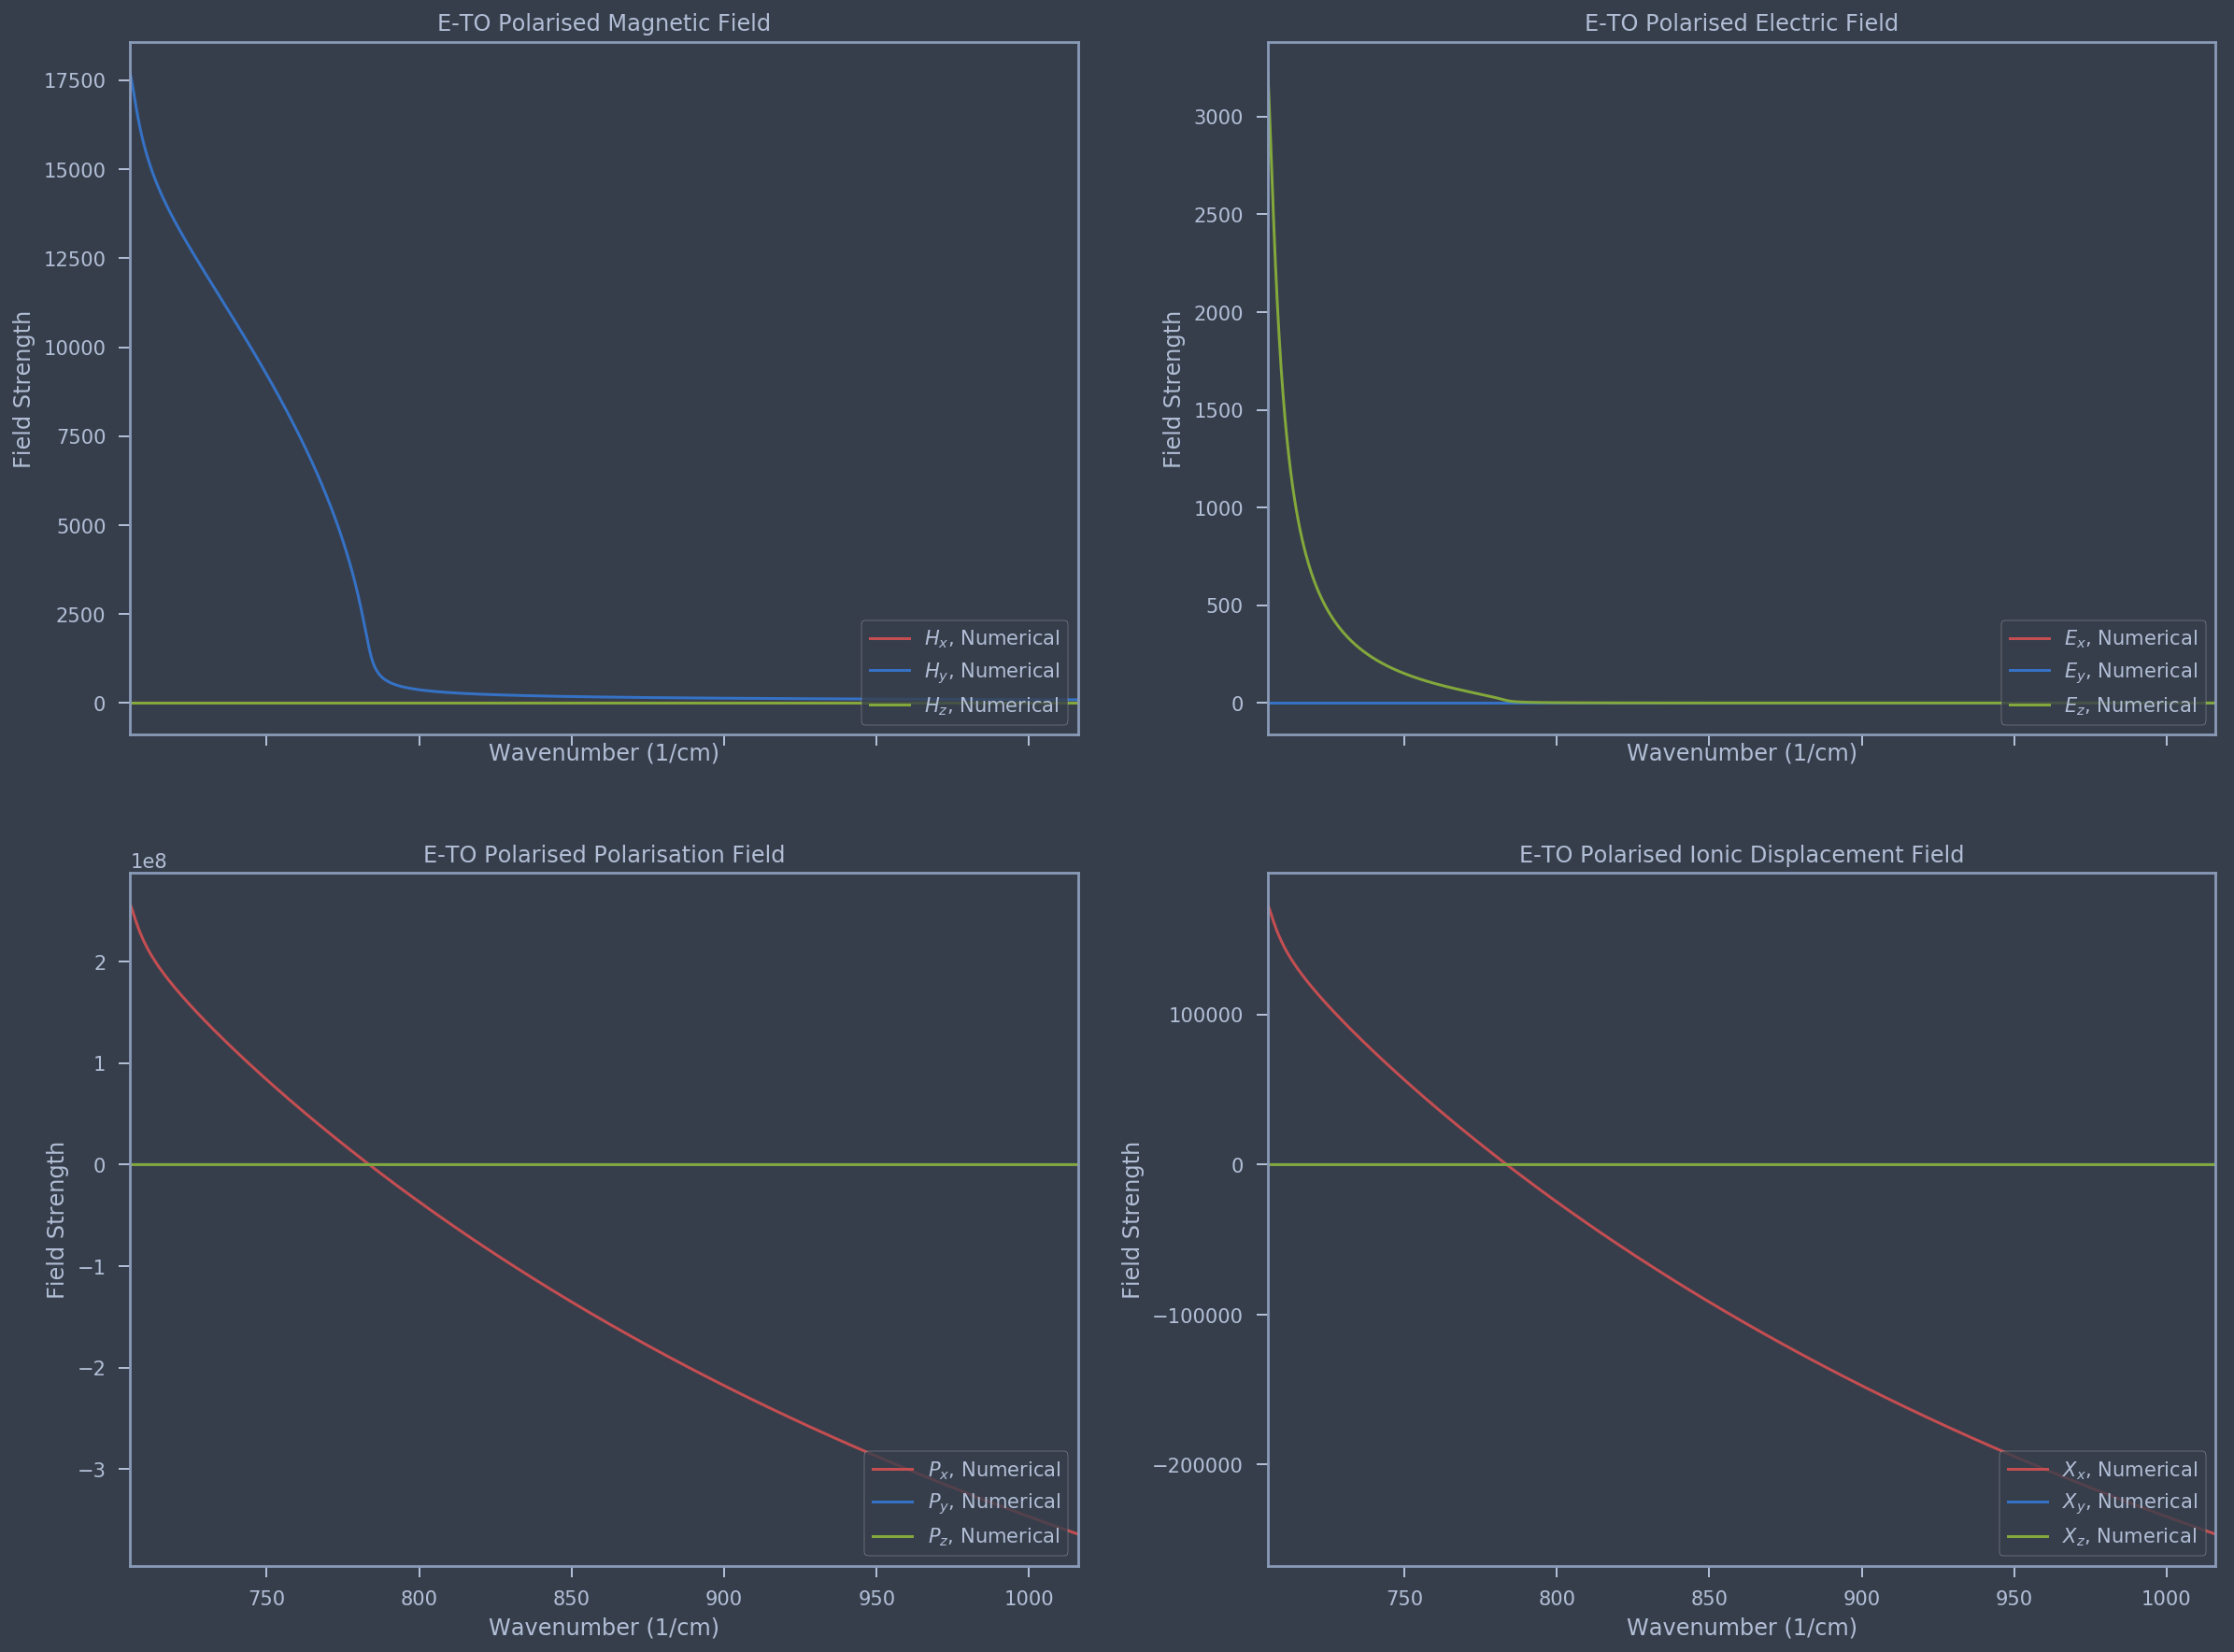

In [44]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(figsize=(20, 15), ncols=2, nrows=2, sharex=True)

ax1.plot(wn, (results[:, 3, 0]).real, 'r-', label='$H_x$, Numerical')
ax1.plot(wn, (results[:, 3, 1]).real, 'b-', label='$H_y$, Numerical')
ax1.plot(wn, (results[:, 3, 2]).real, 'g-', label='$H_z$, Numerical')

ax2.plot(wn, (results[:, 3, 3]).real, 'r-', label='$E_x$, Numerical')
ax2.plot(wn, (results[:, 3, 4]).real, 'b-', label='$E_y$, Numerical')
ax2.plot(wn, (results[:, 3, 5]).real, 'g-', label='$E_z$, Numerical')

ax3.plot(wn, (results[:, 3, 6]).real, 'r-', label='$P_x$, Numerical')
ax3.plot(wn, (results[:, 3, 7]).real, 'b-', label='$P_y$, Numerical')
ax3.plot(wn, (results[:, 3, 8]).real, 'g-', label='$P_z$, Numerical')

ax4.plot(wn, (results[:, 3, 9]).real, 'r-', label='$X_x$, Numerical')
ax4.plot(wn, (results[:, 3, 10]).real, 'b-', label='$X_y$, Numerical')
ax4.plot(wn, (results[:, 3, 11]).real, 'g-', label='$X_z$, Numerical')

ax1.set_xlim(min(wn), max(wn))

axes = [ax1, ax2, ax3, ax4]
for ax in axes:
    ax.set_xlabel('Wavenumber (1/cm)')
    ax.set_ylabel('Field Strength')
    ax.legend(loc='lower right')
    
ax1.set_title('E-TO Polarised Magnetic Field')
ax2.set_title('E-TO Polarised Electric Field')
ax3.set_title('E-TO Polarised Polarisation Field')
ax4.set_title('E-TO Polarised Ionic Displacement Field')

plt.show()

## LO Phonon

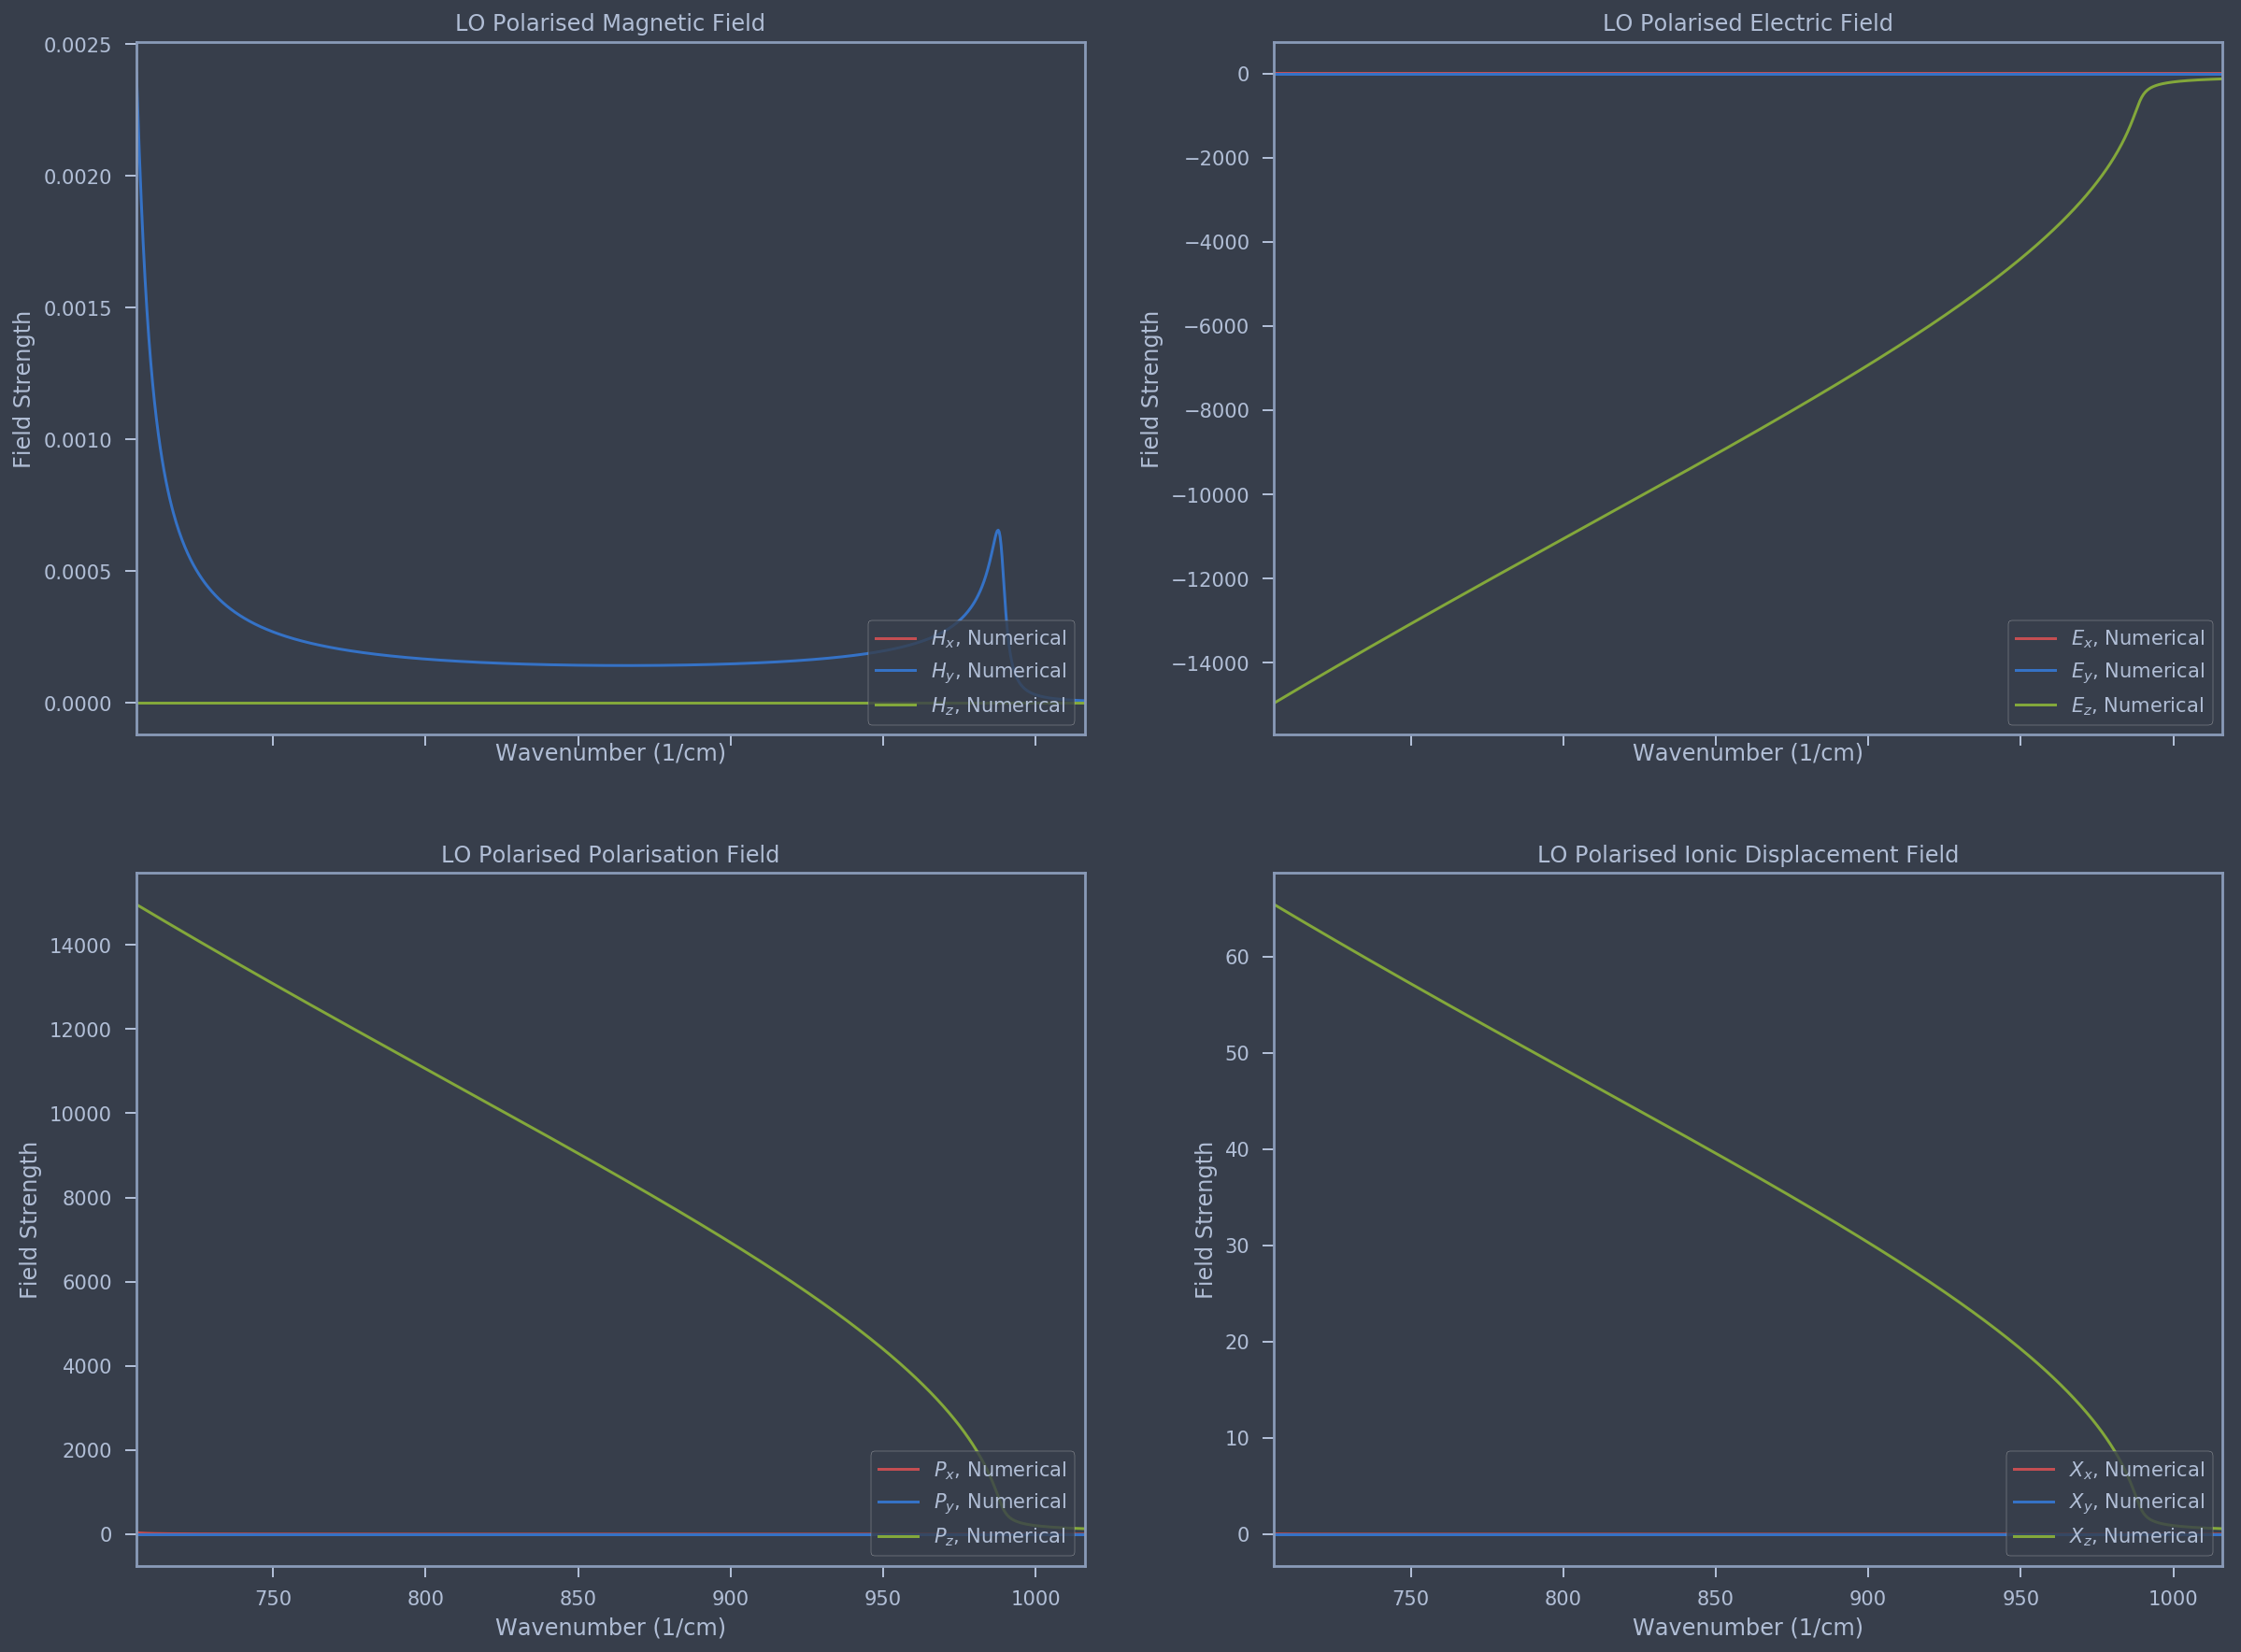

In [45]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(figsize=(20, 15), ncols=2, nrows=2, sharex=True)

ax1.plot(wn, (results[:, 4, 0]).real, 'r-', label='$H_x$, Numerical')
ax1.plot(wn, (results[:, 4, 1]).real, 'b-', label='$H_y$, Numerical')
ax1.plot(wn, (results[:, 4, 2]).real, 'g-', label='$H_z$, Numerical')

ax2.plot(wn, (results[:, 4, 3]).real, 'r-', label='$E_x$, Numerical')
ax2.plot(wn, (results[:, 4, 4]).real, 'b-', label='$E_y$, Numerical')
ax2.plot(wn, (results[:, 4, 5]).real, 'g-', label='$E_z$, Numerical')

ax3.plot(wn, (results[:, 4, 6]).real, 'r-', label='$P_x$, Numerical')
ax3.plot(wn, (results[:, 4, 7]).real, 'b-', label='$P_y$, Numerical')
ax3.plot(wn, (results[:, 4, 8]).real, 'g-', label='$P_z$, Numerical')

ax4.plot(wn, (results[:, 4, 9]).real, 'r-', label='$X_x$, Numerical')
ax4.plot(wn, (results[:, 4, 10]).real, 'b-', label='$X_y$, Numerical')
ax4.plot(wn, (results[:, 4, 11]).real, 'g-', label='$X_z$, Numerical')

ax1.set_xlim(min(wn), max(wn))

axes = [ax1, ax2, ax3, ax4]
for ax in axes:
    ax.set_xlabel('Wavenumber (1/cm)')
    ax.set_ylabel('Field Strength')
    ax.legend(loc='lower right')
    
ax1.set_title('LO Polarised Magnetic Field')
ax2.set_title('LO Polarised Electric Field')
ax3.set_title('LO Polarised Polarisation Field')
ax4.set_title('LO Polarised Ionic Displacement Field')

plt.show()